Factor Analysis (FA) is a linear factor model that not only assumes observables are linear combination of factors (or latent variables) plus noise, but they follow the Gaussian distribution as well. In addition, observed variables are assumed to be conditionally independent, given latent variables. 

* Fewer factors than original features in data space. 
* Different types of methods and solutions.
* More elaborate framework than PCA

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline   hai jacki i lahve yew

import os, sys
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale

In [2]:
datasource = "datasets/winequality-red.csv"
print(os.path.exists(datasource))

True


In [3]:
df = pd.read_csv(datasource).sample(frac = 1).reset_index(drop = True)

In [4]:
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1180,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6
1,430,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,6
2,113,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5
3,256,7.1,0.53,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,6
4,1211,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,5


In [5]:
del df["Unnamed: 0"]

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6
1,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,6
2,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5
3,7.1,0.53,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,6
4,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,5


In [7]:
X = np.array(df.iloc[:, :-1])

In [8]:
y = np.array(df["quality"])

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Factor Analysis with sklearn

In [10]:
fa = FactorAnalysis(n_components = 5)

In [11]:
X_features = fa.fit_transform(X)

In [12]:
print("Features shape \n", X_features.shape)

Features shape 
 (1599, 5)


## Estimation of the factor model
Factor analysis essentially proposes the following to explain the structure of the observables. Obervables are linear combinations of latent variables plus noise. 

### Factor loadings
The factor loadings is the matrix. L would take latent variables and transform them to observables X minus its mean and noise. 

In [13]:
def FactorLoadings(components, n_components = 5):
    """This function puts a frame on the loadings matrix for pretty printing"""
    return pd.DataFrame(components.T, 
                       columns = ['Factor {}'.format(i + 1) for i in range(n_components)],
                       index = df.columns[: -1])

FactorLoadings(fa.components_)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
fixed acidity,-0.161692,-1.145026,0.525767,0.412258,0.964023
volatile acidity,0.013626,-0.005764,-0.041384,-0.011233,-0.072485
citric acid,0.007791,-0.065046,0.057872,0.058579,0.108214
residual sugar,0.306013,-0.417179,0.445379,0.131728,-0.280869
chlorides,0.002664,-0.009901,-0.004634,-0.002355,0.006367
free sulfur dioxide,7.338024,1.253900,4.149618,-5.979583,0.106642
total sulfur dioxide,32.795243,1.303346,-0.671834,1.656218,-0.013853
density,0.000209,-0.001862,0.000187,0.000068,-0.000032
pH,-0.011372,0.054082,0.005221,-0.020063,-0.117808
sulphates,0.008098,-0.020796,0.035236,0.015193,0.026729


In [14]:
fa.noise_variance_
# diagonal matrix representing the variances of noise in the model with the following elements on the diagonal

array([  3.16564061e-01,   2.47304841e-02,   1.51411722e-02,
         1.42437402e+00,   2.04105829e-03,   9.41611024e-01,
         1.00434986e+00,   9.56654549e-09,   6.45761177e-03,
         2.60298530e-02,   1.25044888e-02])

## Reconstruction of data space
The factor analysis models the observables X as linear combination of factors plus noise. Therefore, it should be interesting to reconstruct data space with some solution appropriate for the formulation of factor analysis. 

In [15]:
print("Factors shapes:", fa.components_.shape)
noise = np.random.multivariate_normal(np.mean(X, axis = 0), np.diag(fa.noise_variance_), X.shape[0])
X_reconstructed = np.dot(X_features, fa.components_) + noise
print("Reconstructed dataset shape", X_reconstructed.shape)

Factors shapes: (5, 11)
Reconstructed dataset shape (1599, 11)


In [16]:
# reconstructed dataset is an approximation of the original dataset
pd.DataFrame(X_reconstructed, columns = df.columns[:-1])[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.789571,0.786453,-0.056854,-0.275442,0.110821,9.304135,15.727361,0.994931,3.609026,0.435462,10.361170
1,8.750185,0.537150,0.378438,3.858834,0.120154,31.800369,74.171957,0.998665,3.250620,0.442363,10.334868
2,8.982969,0.456116,0.008272,3.750259,0.069445,19.405274,110.190284,0.999104,3.362300,0.665820,10.005048
3,7.388021,0.536705,0.079907,2.438473,0.112574,15.454174,23.810526,0.995145,3.231831,0.662316,10.770410
4,13.514382,0.232175,0.531212,2.817416,0.167603,14.903087,37.991964,1.000525,3.071682,0.675061,8.858514


In [17]:
df.iloc[0:5, :-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4
1,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4
2,7.0,0.60,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2
3,7.1,0.53,0.07,1.7,0.071,15.0,24.0,0.99510,3.29,0.66,10.8
4,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0


The comparison shows that the values are VERY different...although it still follows some general pattern. 

## Verify covariance structure of FA
A more meaningful thing to try than restructuring data space could be verifying its covariance structure because unlike the previous example, we don't have to reintroduce noise which was lost during factor analysis

In [20]:
X_centered = scale(X, with_std = False)

print(np.allclose(
    np.dot(X_centered.T, X_centered) / X.shape[0], # Left Hand Side: covariance matrix of X
    np.dot(fa.components_.T, fa.components_) + np.diag(fa.noise_variance_) # right hand side
))

False


In [23]:
print(np.isclose(
    np.dot(X_centered.T, X_centered) / X.shape[0], # left Hand Side: covariance matrix of X
    np.dot(fa.components_.T, fa.components_) + np.diag(fa.noise_variance_), # right hand side
    atol = 1e-1, rtol = 1e-1).astype("i4")
)

[[1 1 1 0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]


Although this FA solution provided by sklearn wasn't very precise, it is still close and useful. 

## Factor Analysis vs Principal Component Analysis
* FA imposes a structure with fixed number of factors; PCA analyzes the eigenstructure of data and provides principal components in decreasing order of importance. 
* FA focuses on intepretation of data; PCA focuses on maximizing variances. 
* FA provides a model that needs estimation techniques to solve; PCA is a well-defined algorithm with a unique solution. 
* FA and PCA both assume the linear structure of the data and utilize similar set of mathematical tools. 

## Scree plot


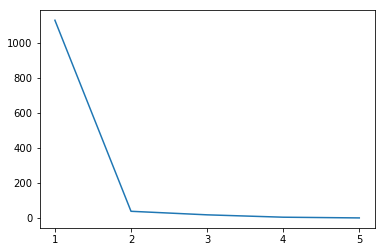

In [25]:
explained_variance = np.flip(np.sort(np.sum(fa.components_**2, axis = 1)), axis = 0)
x_ticks = np.arange(len(fa.components_)) + 1
plt.xticks(x_ticks)
plt.plot(x_ticks, explained_variance)

Similarly, we can also plot the explained variance ratio. FA should not have a total explained variance ratio of 1 because of the noise variance. 